In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 4.8 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import regularizers

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train = x_train/255
x_test = x_test/255
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

# Nuova sezione

In [ ]:
# Step 4 - Improving overfitting

model = keras.Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.3))
model.add(layers.Flatten())

model.add(layers.Dense(units=512,
                      activation='relu'))
# adding L1 regularisation and dropout
activity_regularizer=regularizers.l1(1e-4)
model.add(keras.layers.Dropout(0.3))

model.add(layers.Dense(units=384,
                      activation='relu'))
activity_regularizer=regularizers.l1(1e-4)
model.add(keras.layers.Dropout(0.4))

model.add(layers.Dense(10,activation='softmax'))
model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    #return model

In [ ]:
#model.summary()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(x_train,y_cat_train,epochs=100,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/100
1563/1563 [==============================] - 99s 62ms/step - loss: 1.7626 - accuracy: 0.3511 - val_loss: 1.4338 - val_accuracy: 0.4849
Epoch 2/100
1563/1563 [==============================] - 90s 58ms/step - loss: 1.4117 - accuracy: 0.4905 - val_loss: 1.2613 - val_accuracy: 0.5541
Epoch 3/100
1563/1563 [==============================] - 91s 58ms/step - loss: 1.2826 - accuracy: 0.5432 - val_loss: 1.1954 - val_accuracy: 0.5763
Epoch 4/100
1563/1563 [==============================] - 90s 58ms/step - loss: 1.1892 - accuracy: 0.5775 - val_loss: 1.1165 - val_accuracy: 0.6083
Epoch 5/100
1563/1563 [==============================] - 91s 58ms/step - loss: 1.1098 - accuracy: 0.6044 - val_loss: 1.0474 - val_accuracy: 0.6360
Epoch 6/100
1563/1563 [==============================] - 91s 59ms/step - loss: 1.0455 - accuracy: 0.6331 - val_loss: 1.0136 - val_accuracy: 0.6453
Epoch 7/100
1563/1563 [==============================] - 93s 59ms/step - loss: 0.9875 - accuracy: 0.6526 - val_loss: 0

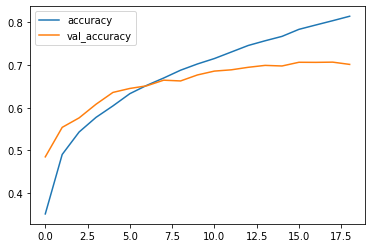

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()

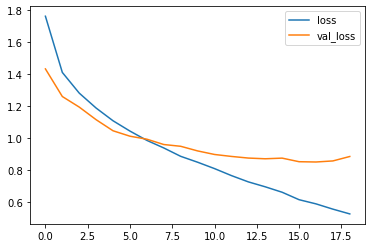

In [ ]:
losses[['loss','val_loss']].plot()